# Snow depth timeseries of treatment plots from WY2023
## Manuscript Figures 
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [2]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [3]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

Below is the normalization code from **4_normalize_snowdepth** notebook\
keep it here for now incase I want to plot the normalized snow depth too. 

In [4]:
# normalized to the forest side (f) vs the gap side (g) on the same slope as the treatment sites
# north sites 
CN20['normf'] = CN20['Median_depth'] - CNF23['Median_depth']
CN20['normg'] = CN20['Median_depth'] - CNG23['Median_depth']

CN50['normf'] = CN50['Median_depth'] - CNF23['Median_depth']
CN50['normg'] = CN50['Median_depth'] - CNG23['Median_depth']

CN60['normf'] = CN60['Median_depth'] - CNF23['Median_depth']
CN60['normg'] = CN60['Median_depth'] - CNG23['Median_depth']

CN70['normf'] = CN70['Median_depth'] - CNF23['Median_depth']
CN70['normg'] = CN70['Median_depth'] - CNG23['Median_depth']

# south sites
CS20['normf'] = CS20['Median_depth'] - CSF23['Median_depth']
CS20['normg'] = CS20['Median_depth'] - CSG23['Median_depth']

CS50['normf'] = CS50['Median_depth'] - CSF23['Median_depth']
CS50['normg'] = CS50['Median_depth'] - CSG23['Median_depth']

CS60['normf'] = CS60['Median_depth'] - CSF23['Median_depth']
CS60['normg'] = CS60['Median_depth'] - CSG23['Median_depth']

CS120['normf'] = CS120['Median_depth'] - CSF23['Median_depth']
CS120['normg'] = CS120['Median_depth'] - CSG23['Median_depth']

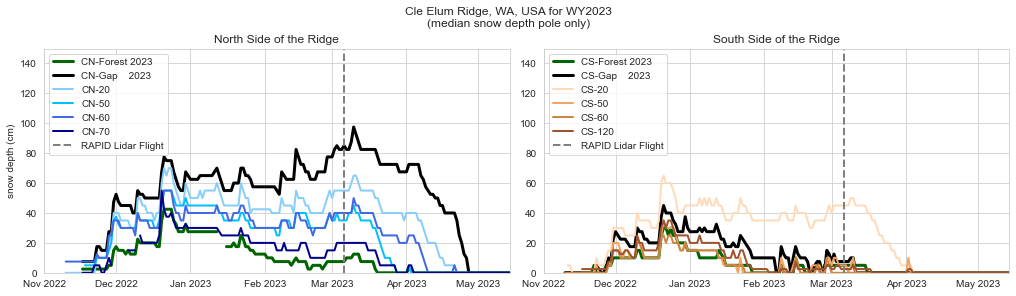

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Making the colors match for each BAF...

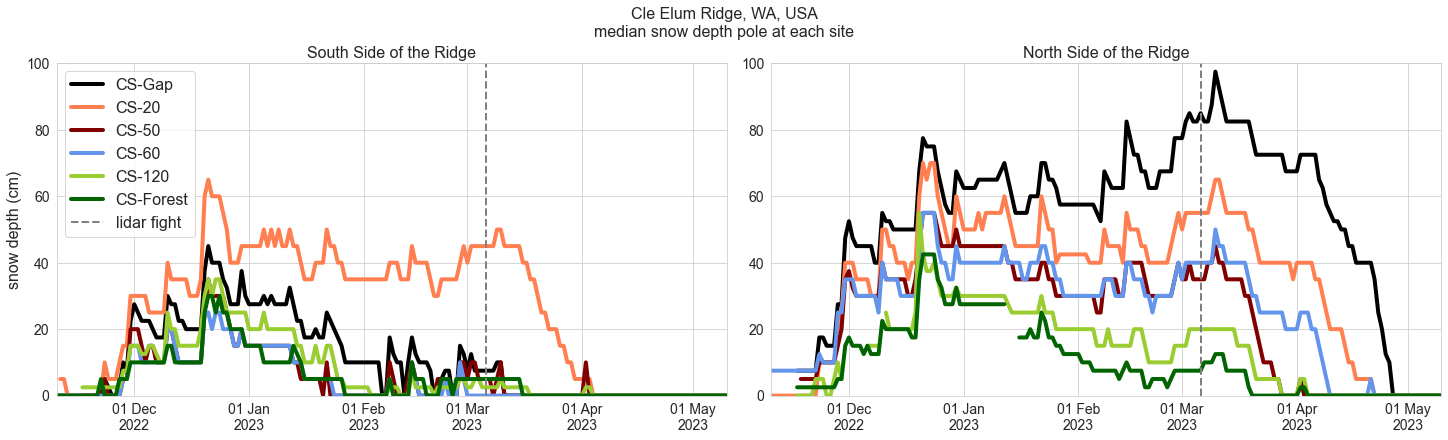

In [34]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

linewidth = 4
# then just plot the median for the forest and gap sites
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

linewidth = 4
# add the other treatment sites for the north and south sides
# color20 = "#E49273"; color50 = "#D4CB92"; color60 = "#395c6b"; color70 = "#6A041D"
color20 = "coral"; color50 = "maroon"; color60 = "cornflowerblue"; color70 = "yellowgreen"

ax[1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 16)
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA\nmedian snow depth pole at each site", fontsize = 16)

ax[1].set_title("North Side of the Ridge", fontsize = 16)
ax[0].set_title("South Side of the Ridge", fontsize = 16)

# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].legend(loc='upper left', fontsize = 16)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

plt.show()

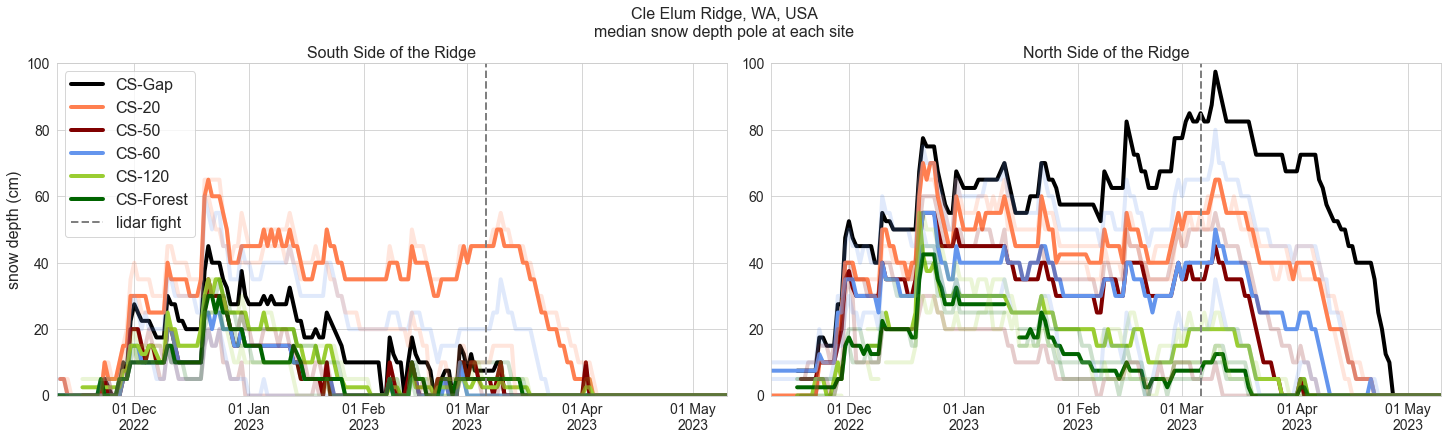

In [43]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

linewidth = 4
# then just plot the median for the forest and gap sites
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

linewidth = 4
# add the other treatment sites for the north and south sides
# color20 = "#E49273"; color50 = "#D4CB92"; color60 = "#395c6b"; color70 = "#6A041D"
color20 = "coral"; color50 = "maroon"; color60 = "cornflowerblue"; color70 = "yellowgreen"

# plot median
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

linewidth = 4
alpla = 0.7
# plot maximum
ax[1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Maximum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CSF23['Date'], CSF23['Maximum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot maximum
ax[1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


# OTHERS 
# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 16)
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA\nmedian snow depth pole at each site", fontsize = 16)

ax[1].set_title("North Side of the Ridge", fontsize = 16)
ax[0].set_title("South Side of the Ridge", fontsize = 16)

# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].legend(loc='upper left', fontsize = 16)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

plt.show()

Put the min, median, max, all on different plots? 

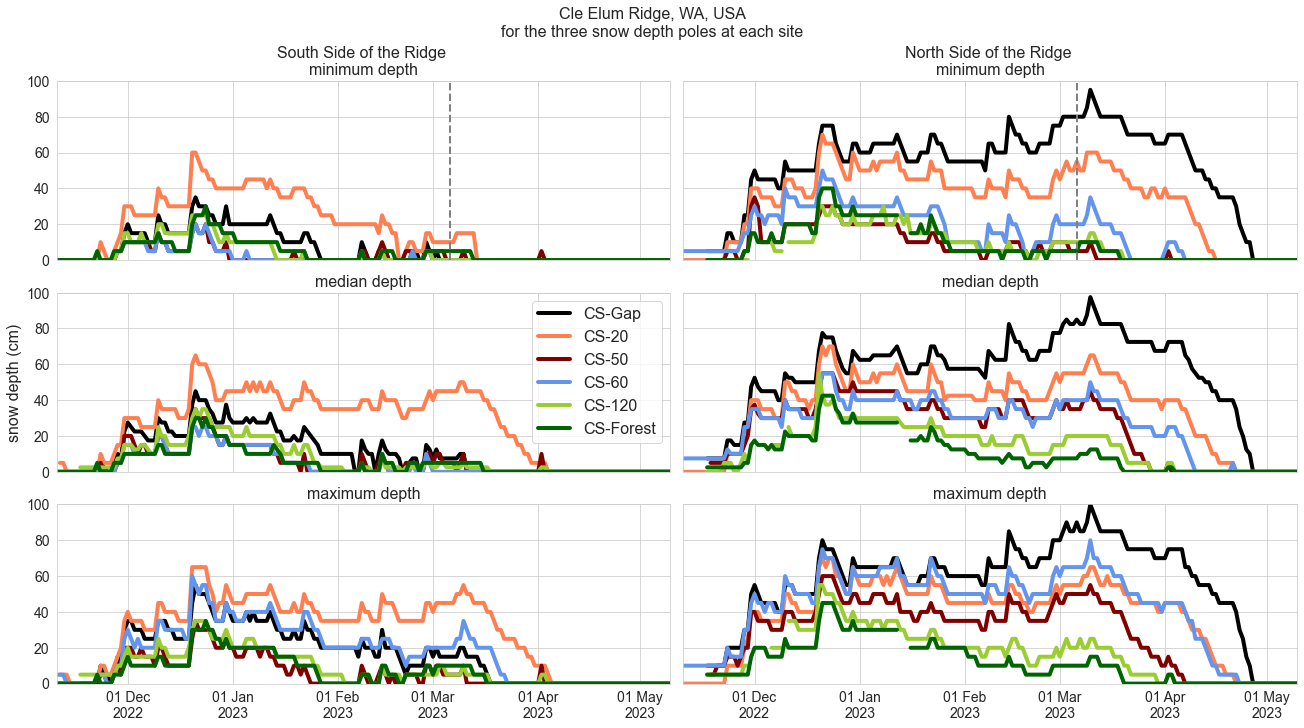

In [63]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,2,figsize = (18,10), sharey=True, sharex=True, constrained_layout=True)

colorf1 = "darkgreen"
colorg1 = "black"

linewidth = 4
alpha = 1
color20 = "coral"; color50 = "maroon"; color60 = "cornflowerblue"; color70 = "yellowgreen"

# plot maximum
ax[0,1].plot(CNG23['Date'], CNG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth)
ax[0,0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth)

ax[0,1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[0,0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot median
ax[1,1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label='CN-Gap', linewidth=linewidth)
ax[1,0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label='CS-Gap', linewidth=linewidth)

ax[1,1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[1,1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[1,1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[1,1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)

ax[1,0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[1,0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[1,0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[1,0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)

# putting forest here so it appears at the bottom of the legend
ax[1,1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)
ax[1,0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

# plot maximum
ax[2,1].plot(CNG23['Date'], CNG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth)
ax[2,0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth)

ax[2,1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[2,1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[2,1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[2,1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[2,0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[2,0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[2,0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[2,0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

ax[2,1].plot(CNF23['Date'], CNF23['Maximum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[2,0].plot(CSF23['Date'], CSF23['Maximum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


# OTHERS 
# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=2)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

ax[0,0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[0,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[2,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[2,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[1,0].set_ylabel("snow depth (cm)", fontsize = 16)

plt.suptitle("Cle Elum Ridge, WA, USA\nfor the three snow depth poles at each site", fontsize = 16)


ax[0,1].set_title("North Side of the Ridge \nminimum depth", fontsize = 16)
ax[0,0].set_title("South Side of the Ridge \nminimum depth", fontsize = 16)

ax[1,1].set_title("median depth", fontsize = 16)
ax[1,0].set_title("median depth", fontsize = 16)
ax[2,1].set_title("maximum depth", fontsize = 16)
ax[2,0].set_title("maximum depth", fontsize = 16)

# increase the size of the x and y tick marks
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[2,0].tick_params(axis='both', which='major', labelsize=14)
ax[2,1].tick_params(axis='both', which='major', labelsize=14)

ax[1,0].legend(loc='upper right', fontsize = 16)

ax[0,0].set_ylim(0,100)
ax[0,1].set_ylim(0,100)

plt.show()

Plot the fill between for all the sites too

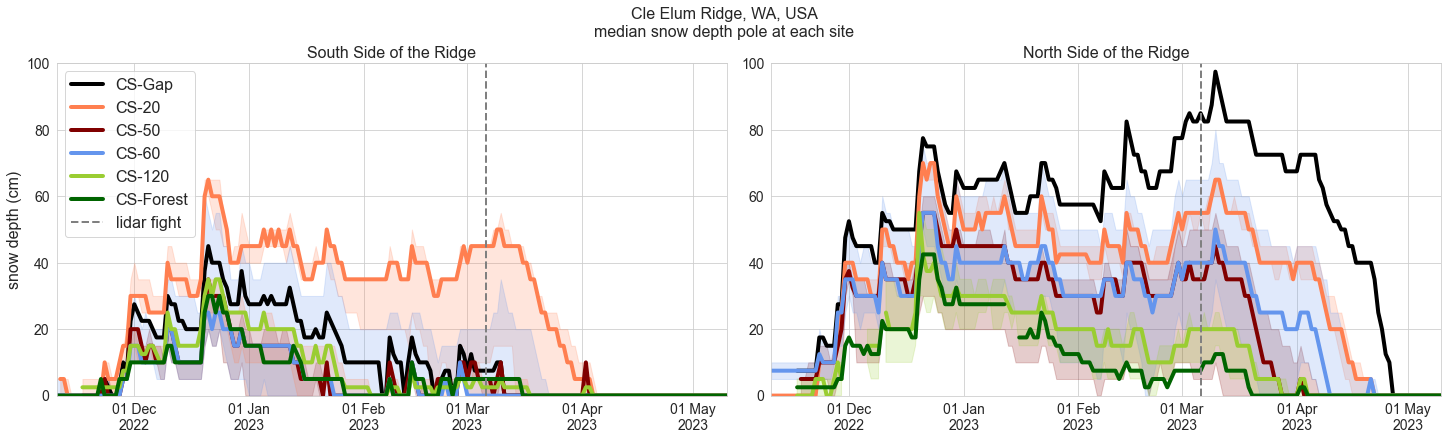

In [46]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

linewidth = 4
# then just plot the median for the forest and gap sites
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

linewidth = 4
# add the other treatment sites for the north and south sides
# color20 = "#E49273"; color50 = "#D4CB92"; color60 = "#395c6b"; color70 = "#6A041D"
color20 = "coral"; color50 = "maroon"; color60 = "cornflowerblue"; color70 = "yellowgreen"

# plot median
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

linewidth = 4
alpla = 0.7
# plot the fill between.... it's going to look awful
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = color20, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = color50, alpha = alpha)
ax[1].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = color60, alpha = alpha)
ax[1].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = color70, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = color20, alpha = alpha)
ax[0].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = color50, alpha = alpha)
ax[0].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = color60, alpha = alpha)
ax[0].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = color20, alpha = alpha)


# OTHERS 
# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 16)
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA\nmedian snow depth pole at each site", fontsize = 16)

ax[1].set_title("North Side of the Ridge", fontsize = 16)
ax[0].set_title("South Side of the Ridge", fontsize = 16)

# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].legend(loc='upper left', fontsize = 16)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

plt.show()

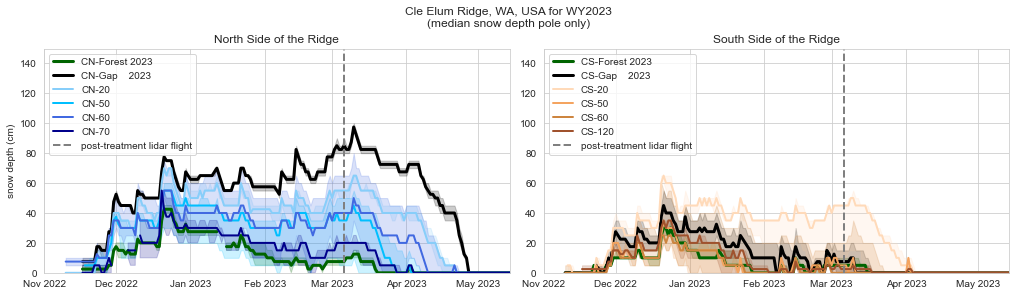

In [7]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = 'lightskyblue', alpha = alpha)
ax[0].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = 'deepskyblue', alpha = alpha)
ax[0].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = 'royalblue', alpha = alpha)
ax[0].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = 'darkblue', alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = 'peachpuff', alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = 'sandybrown', alpha = alpha)
ax[1].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = 'peru', alpha = alpha)
ax[1].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = 'sienna', alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the same BAFs on the north and south together to compare 

The code above uses the previous colors, but I am going to\
make all the north and south sides match for simplicity 

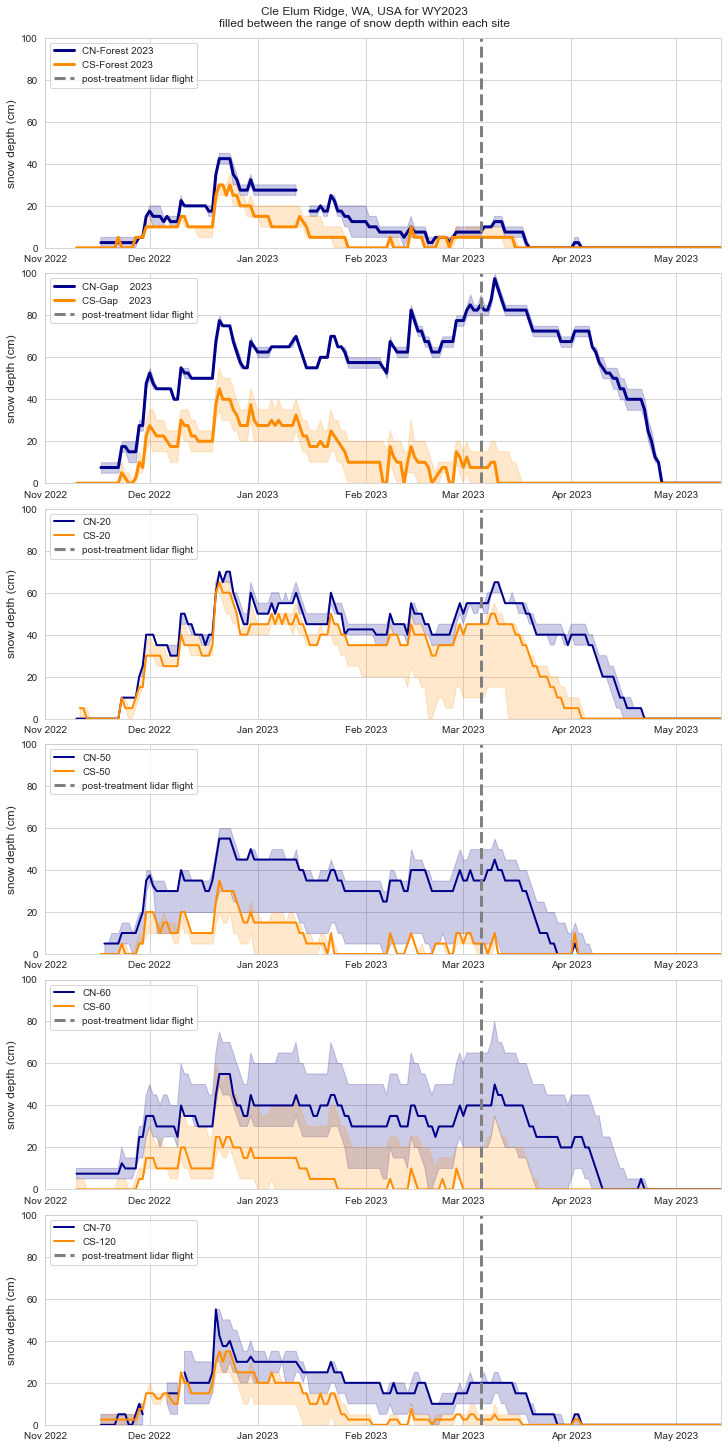

In [9]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[2].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[2].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[5].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[2].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[3].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[4].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[5].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[2].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[3].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[4].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[5].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

Same one as above, except with the gap at the top, then BAF 20,50,60,120, then the forest site

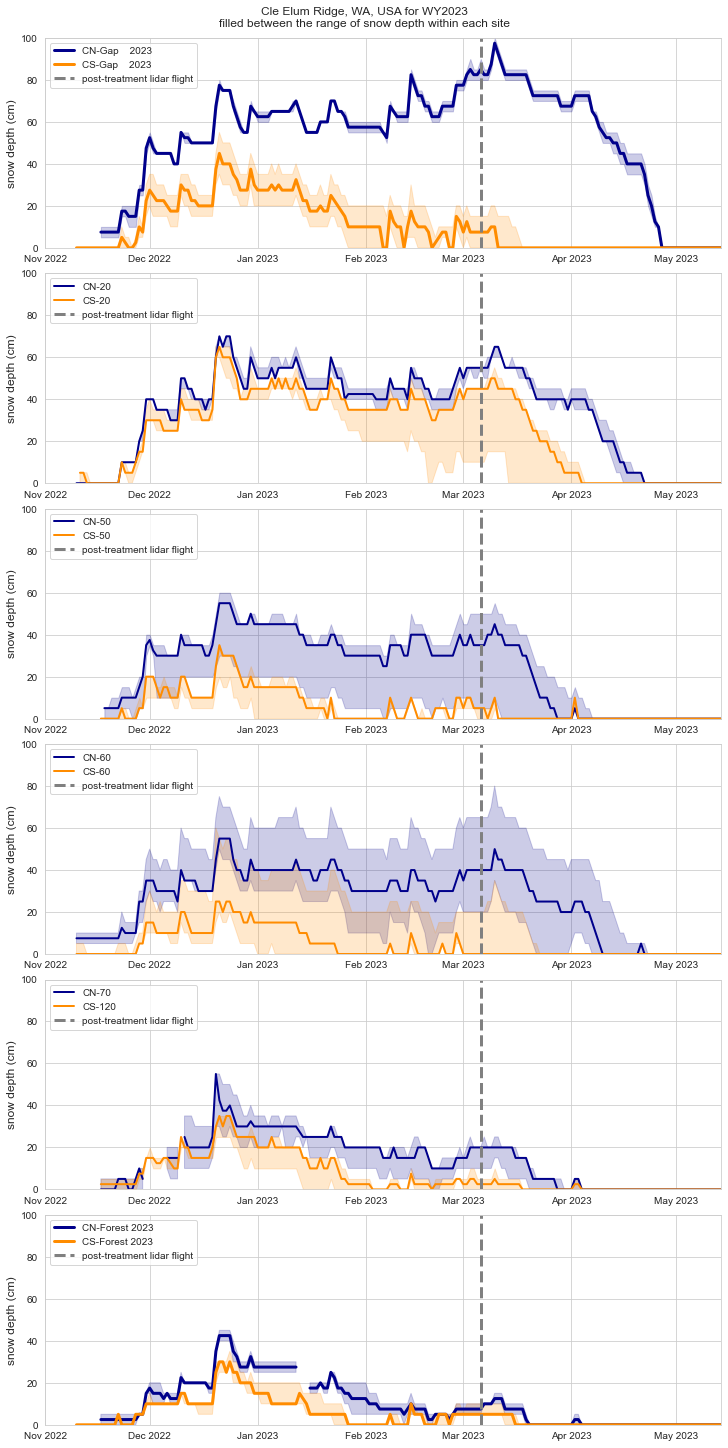

In [10]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

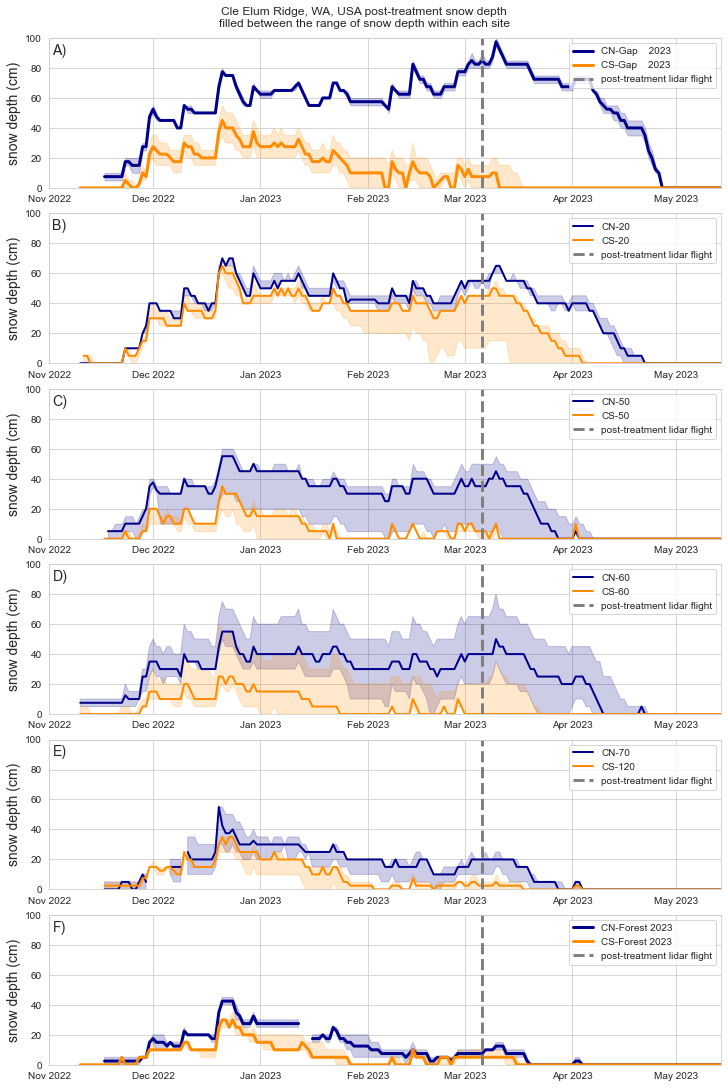

In [11]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,15), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=14)
ax[1].set_ylabel("snow depth (cm)", fontsize=14)
ax[2].set_ylabel("snow depth (cm)", fontsize=14)
ax[3].set_ylabel("snow depth (cm)", fontsize=14)
ax[4].set_ylabel("snow depth (cm)", fontsize=14)
ax[5].set_ylabel("snow depth (cm)", fontsize=14)

plt.suptitle("Cle Elum Ridge, WA, USA post-treatment snow depth\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[3].legend(loc='upper right')
ax[4].legend(loc='upper right')
ax[5].legend(loc='upper right')

# add A and B labels on subplots 
ax[0].text(0.005, 0.89, "A)", transform=ax[0].transAxes, size=14)
ax[1].text(0.005, 0.89, "B)", transform=ax[1].transAxes, size=14)
ax[2].text(0.005, 0.89, "C)", transform=ax[2].transAxes, size=14)
ax[3].text(0.005, 0.89, "D)", transform=ax[3].transAxes, size=14)
ax[4].text(0.005, 0.89, "E)", transform=ax[4].transAxes, size=14)
ax[5].text(0.005, 0.89, "F)", transform=ax[5].transAxes, size=14)

plt.show()

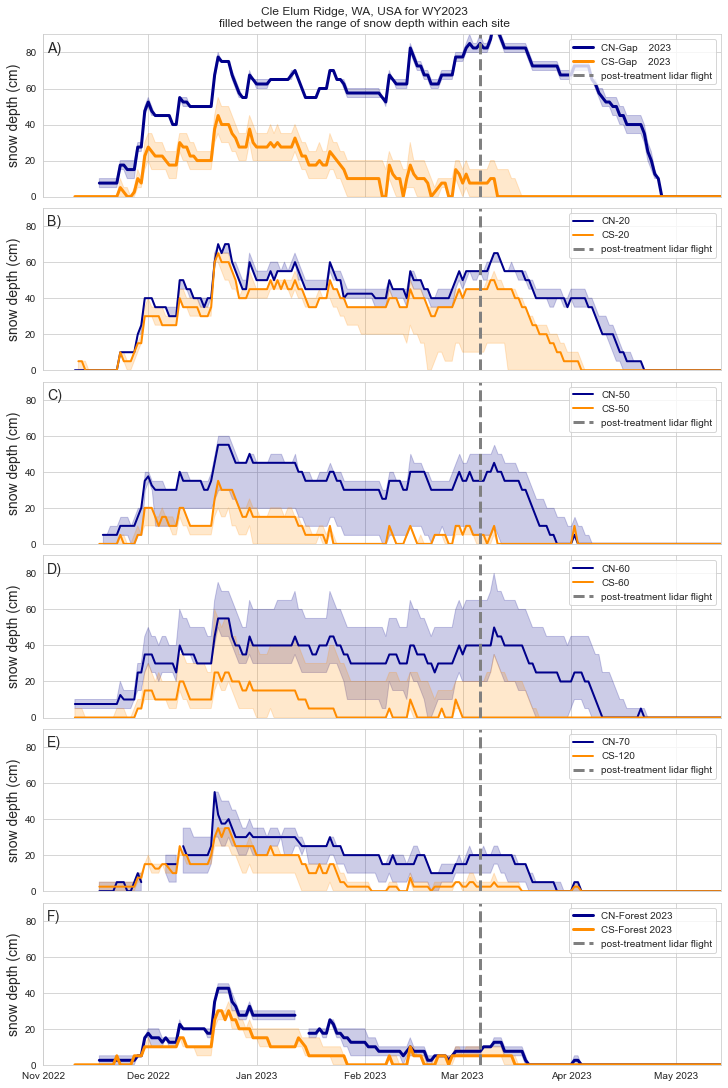

In [12]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,15), sharey=True, sharex=True, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,90)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=14)
ax[1].set_ylabel("snow depth (cm)", fontsize=14)
ax[2].set_ylabel("snow depth (cm)", fontsize=14)
ax[3].set_ylabel("snow depth (cm)", fontsize=14)
ax[4].set_ylabel("snow depth (cm)", fontsize=14)
ax[5].set_ylabel("snow depth (cm)", fontsize=14)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[3].legend(loc='upper right')
ax[4].legend(loc='upper right')
ax[5].legend(loc='upper right')

# add A and B labels on subplots 
ax[0].text(0.005, 0.89, "A)", transform=ax[0].transAxes, size=14)
ax[1].text(0.005, 0.89, "B)", transform=ax[1].transAxes, size=14)
ax[2].text(0.005, 0.89, "C)", transform=ax[2].transAxes, size=14)
ax[3].text(0.005, 0.89, "D)", transform=ax[3].transAxes, size=14)
ax[4].text(0.005, 0.89, "E)", transform=ax[4].transAxes, size=14)
ax[5].text(0.005, 0.89, "F)", transform=ax[5].transAxes, size=14)

plt.show()

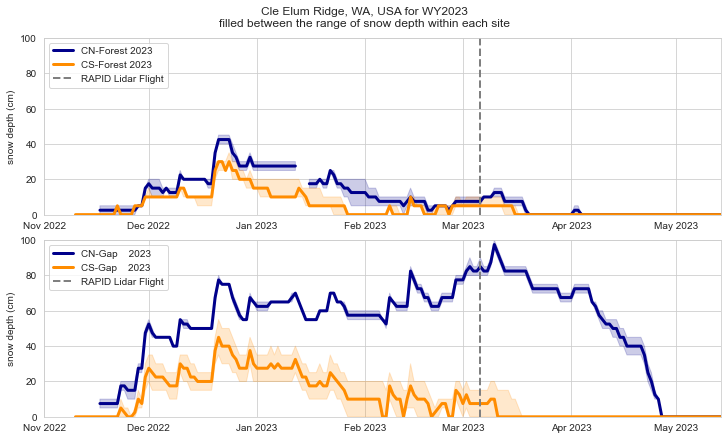

In [13]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")
fig, ax = plt.subplots(2,1,figsize = (10,6), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

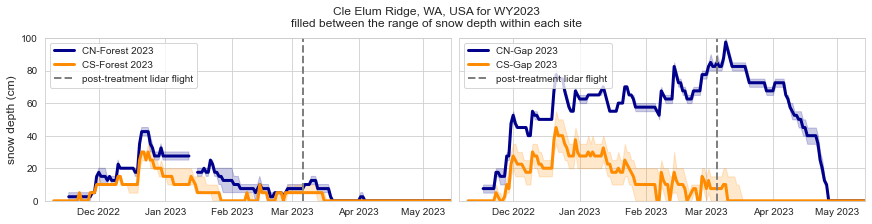

In [14]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,2,figsize = (12,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap 2023", linewidth=3)
ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap 2023", linewidth=3)

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()

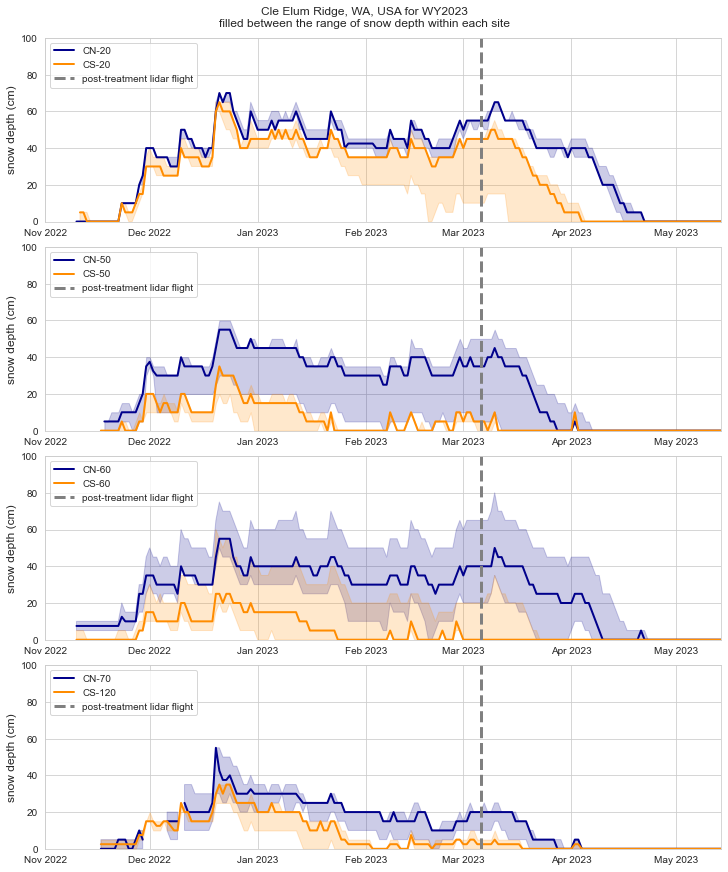

In [15]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(4,1,figsize = (10,12), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# # CONTROL SITES
# # fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
# ax[1].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
# ax[0].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# # then just plot the median for the forest and gap sites
# ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
# ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
# ax[0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
# ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

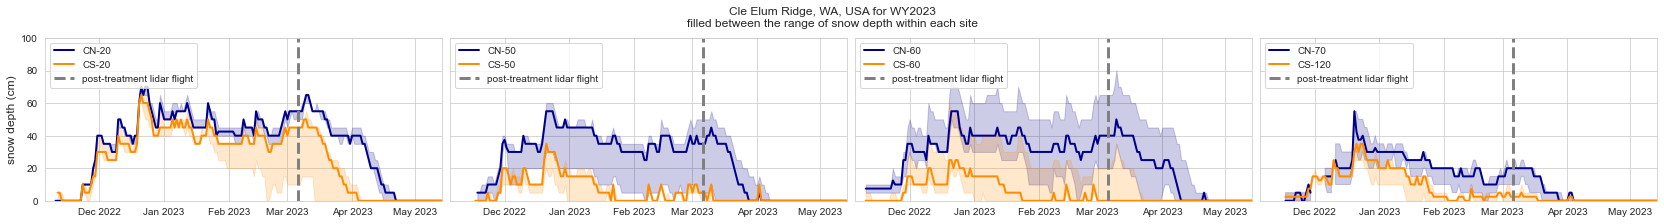

In [16]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

Okay, instead of plotting by BAF\
let's plot the site "openness" using the code from John.

In [17]:
#SDD_CN23
#SDD_CS23

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_780\2408157124.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_780\2408157124.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'gap fraction (%)')


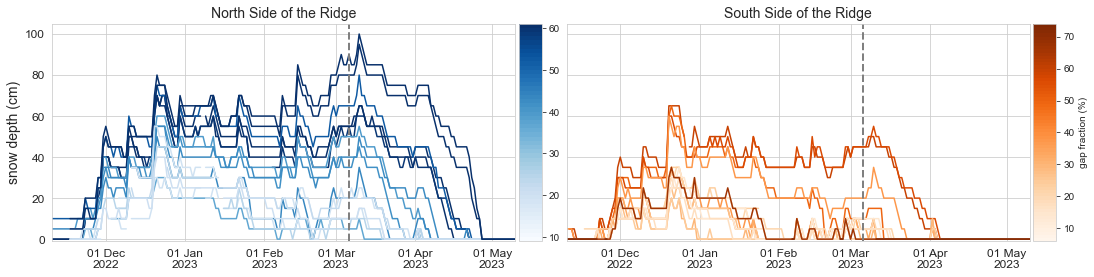

In [69]:
fig, ax = plt.subplots(1,2, figsize = (18,4), sharex=True, sharey=True)

# plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("North Side of the Ridge")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'gap fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("South Side of the Ridge")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# increase the size of the y axis labels
ax[0].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

# increase the size of the yaxis title 
ax[0].yaxis.label.set_size(14)

# increase the size of the x axis labels
ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

# increase the size of the titles 
ax[0].title.set_size(14)
ax[1].title.set_size(14)

# # add an A) and B) to the subplots
# ax[0].text(0.01, 0.93, 'A)', transform=ax[0].transAxes, size=16)
# ax[1].text(0.01, 0.93, 'B)', transform=ax[1].transAxes, size=16)

# # shift the legend down a little 
# ax[0].legend(loc='upper left', bbox_to_anchor=(0.0, .93))
# ax[1].legend(loc='upper left', bbox_to_anchor=(0.0, .93))

# increase the size of the suptitle text 
# plt.suptitle("Cle Elum Ridge, WA, USA\n post-treatment WY2023", size=16)

# reduce the horizonal space between subplots
plt.subplots_adjust(wspace=0.05)

plt.show()